<a href="https://colab.research.google.com/github/josepheric/Titanic-Survivor-Prediction/blob/main/FP_KK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survivor Prediction

## Import Dataset

In [ ]:
#read csv
import pandas as pd

url = 'https://raw.githubusercontent.com/josepheric/Titanic-Survivor-Prediction/main/train.csv'
dataset = pd.read_csv(url)

# Things to add:
# 1.	Visualisasi pake orange
# 2.	Balancing
# 3.	Outlier management

In [ ]:
#Check dataset sudah terbaca
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analisa Awal Dataset

In [ ]:
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dataset["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#Itung values dari tiap attribut
dataset["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
dataset["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
dataset["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
dataset["Ticket"].value_counts()

CA. 2343        7
1601            7
347082          7
347088          6
3101295         6
               ..
350035          1
28425           1
F.C.C. 13528    1
330932          1
374746          1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
dataset["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
dataset["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Hasil Analisis Awal: 
*  Ada 3 Categorical Features
*  Attribut Age, Cabin, dan Embarked punya null values









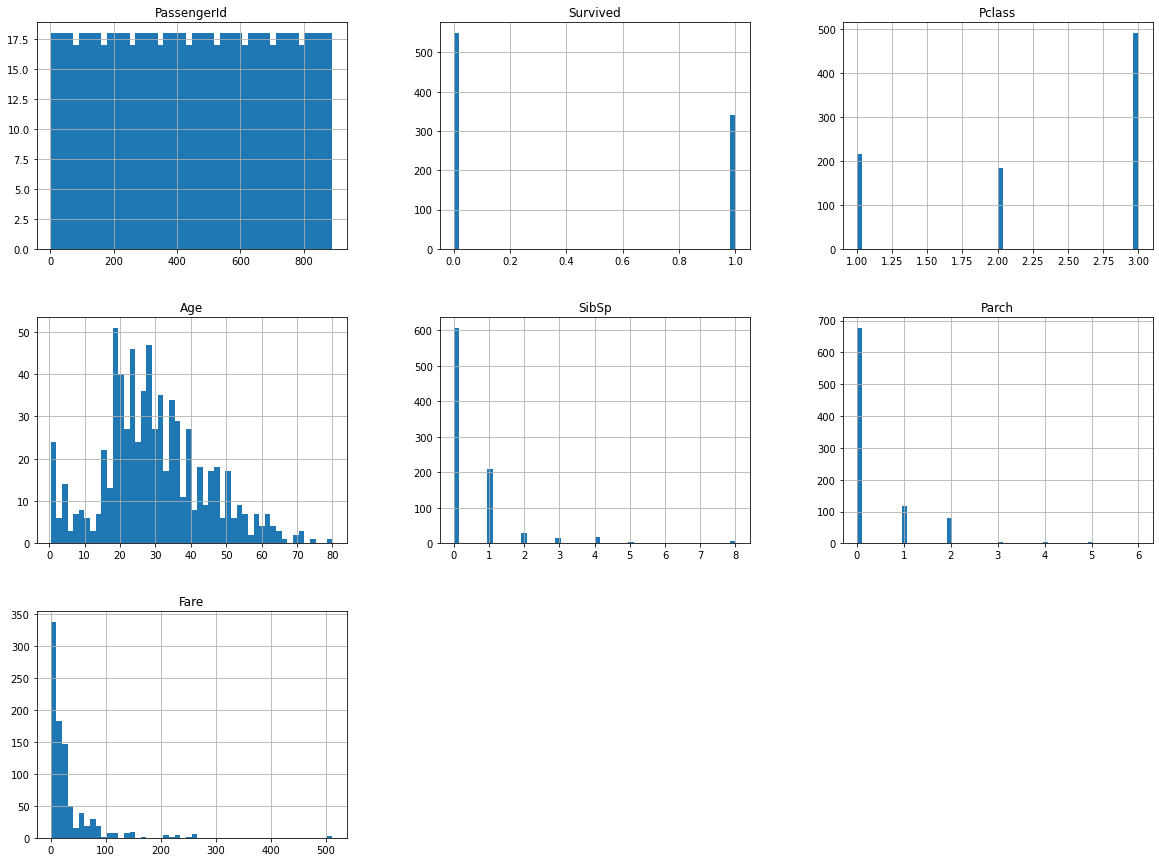

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
corr_matrix = dataset.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Correlation Analysis: 
1.   Passanger ID clearly not a thing -> remove 
2.   List itPclass korelasi negatif Fare korelasi positifem




## Features Engineering

In [ ]:
import string
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        try:
          if big_string.find(substring) != -1:
            return substring
        except AttributeError:
          return None  # or some other value
        
    
    return np.nan

In [ ]:
# Features Engineering

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

dataset['Title'] = dataset['Name'].map(lambda x: substrings_in_string(x, title_list))

#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title


In [ ]:
dataset['Cabin'].astype(str)

0       nan
1       C85
2       nan
3      C123
4       nan
       ... 
886     nan
887     B42
888     nan
889    C148
890     nan
Name: Cabin, Length: 891, dtype: object

In [ ]:
# Family Size: size of a person's family
dataset["family"] = dataset["Parch"]+ dataset["SibSp"]

# Price for each person
dataset ["Fare/Person"] = dataset["Fare"] / (dataset["family"]+1) 

# Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
dataset['Deck'] = dataset['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

# Age * Class 
dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']

# Title
dataset['Title'] = dataset.apply(replace_titles, axis=1)

In [ ]:
dataset['Deck'].value_counts()

C    59
B    47
D    33
E    33
A    15
F    12
G     4
T     1
Name: Deck, dtype: int64

In [ ]:
corr_matrix = dataset.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Fare/Person    0.221600
Parch          0.081629
family         0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Age*Class     -0.338900
Name: Survived, dtype: float64

## Preprocessing Data

In [ ]:
# Cleaning Data

# SimpleImputer -> fill null with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#median only on numerican attr. ; drop other attr.
titanic_num = dataset[["Age", "SibSp", "Parch", "Fare", "Fare/Person", "family", "Age*Class"]]

#fit will estimate the median from housing_dum dataset
imputer.fit(titanic_num)

#median of each attr. is stored here:
imputer.statistics_

array([28.    ,  0.    ,  0.    , 14.4542,  8.3   ,  0.    , 58.    ])

In [ ]:
# Categorical Attr

titanic_cat = dataset[["Sex","Embarked","Pclass","Title", "Deck"]]
dataset["Embarked"].fillna("S", inplace=True)
dataset["Deck"].fillna("n/a", inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
 13  family       891 non-null    int64  
 14  Fare/Person  891 non-null    float64
 15  Deck         891 non-null    object 
 16  Age*Class    714 non-null    float64
dtypes: float64(4), int64(6), object(7)
memory usage: 118.5+ KB


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#This is our numerical column pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [ ]:
# Split Dataset

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
# Fresh Set
titanic_train = dataset.drop("Survived", axis=1)
titanic_train_labels = dataset["Survived"].copy()

# Fresh Set
titanic_test = dataset.drop("Survived", axis=1)
titanic_test_labels = dataset["Survived"].copy()

In [ ]:
# OneHotEncode
# Encoded to: 001, 010, 100, etc
from sklearn.preprocessing import OneHotEncoder

#Column Transformer: handle categorical and numerical columns toggether
from sklearn.compose import ColumnTransformer
num_attribs = list(titanic_num)
cat_attribs = list(titanic_cat)



full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs), #This is our categorical column!
])

titanic_prepared = full_pipeline.fit_transform(titanic_train)

In [ ]:
titanic_prepared.shape

(891, 28)

## Trying multiple models (Model Kasar Dengan Paramaeter Default)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, titanic_prepared, titanic_train_labels, cv=10, scoring = 'accuracy')
forest_scores.mean()

0.8171285892634208

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
scores = cross_val_score(sgd_clf, titanic_prepared, titanic_train_labels, cv=10, scoring = 'accuracy')
scores.mean()

0.7946192259675404

In [ ]:
from sklearn.svm import LinearSVC

LinSVC_clf = LinearSVC(random_state=42)
scores = cross_val_score(LinSVC_clf, titanic_prepared, titanic_train_labels, cv=10, scoring = 'accuracy')
scores.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.8294382022471909

In [ ]:
from sklearn.svm import SVC
poly_kernel_svc_clf = SVC(kernel="poly", degree=2)
scores = cross_val_score(poly_kernel_svc_clf, titanic_prepared, titanic_train_labels, cv=10, scoring = 'accuracy')
scores.mean()

0.8305243445692885

In [ ]:
rbf_kernel_svc_clf = SVC(kernel="rbf")
scores = cross_val_score(rbf_kernel_svc_clf, titanic_prepared, titanic_train_labels, cv=10, scoring = 'accuracy')
scores.mean()

0.8339076154806492

In [ ]:
titanic_prepared.shape

(891, 28)

## Buat DataFrame Hasil

In [ ]:
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
def get_metrics(titanic_test_labels, y_pred):
    acc=np.round(accuracy_score(titanic_test_labels, y_pred),4)
    prec=np.round(precision_score(titanic_test_labels, y_pred,average='weighted'),4)
    recall=np.round(recall_score(titanic_test_labels, y_pred,average='weighted'),4)
    f1=np.round(f1_score(titanic_test_labels, y_pred,average='weighted'),4)
    return [acc,prec,recall,f1]
col=['Model','Accuracy','Precision','Recall','F1']
Result=pd.DataFrame(columns=col)

## SGDClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
#Model
from sklearn.linear_model import SGDClassifier

#GridSearch = coba semua kombinasi hpyerparameters
param_grid = [
    {'alpha': [0.0001, 0.001, 0.005], 'loss': ["hinge", "log"], 
    'penalty': ["l2","l1","elasticnet"]
    }]

sgd_clf = SGDClassifier(random_state=42)

grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring = 'accuracy',
                           return_train_score=True)

grid_search.fit(titanic_prepared, titanic_train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.001, 0.005],
                          'loss': ['hinge', 'log'],
                          'penalty': ['l2', 'l1', 'elasticnet']}],
             pre_dispatch='2*n_jo

In [ ]:
grid_search.best_score_

0.8249450756386919

In [ ]:
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,alpha,loss,penalty,Accuracy
0,0.0001,hinge,l2,0.776637
1,0.0001,hinge,l1,0.769914
2,0.0001,hinge,elasticnet,0.775519
3,0.0001,log,l2,0.772136
4,0.0001,log,l1,0.780033
5,0.0001,log,elasticnet,0.775551
6,0.0010,hinge,l2,0.805831
7,0.0010,hinge,l1,0.810332
8,0.0010,hinge,elasticnet,0.810345
9,0.0010,log,l2,0.824945


In [ ]:
# Transform Test Set
test = full_pipeline.fit_transform(titanic_test)

from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(test)
accuracy_score(titanic_test_labels, y_pred)

0.8181818181818182

In [ ]:
get_metrics(titanic_test_labels,y_pred)

[0.8182, 0.8208, 0.8182, 0.8191]

In [ ]:
res=['SGD']+get_metrics(titanic_test_labels,y_pred)
Result=pd.concat([Result,pd.DataFrame([res],columns=col)])

## Random Forest Classifier

In [ ]:
#GridSearch = coba semua kombinasi hpyerparameters
param_grid = [
    {'n_estimators': [10, 100, 1000], 
     'criterion': ["gini", "entropy"]
    }]

RF_clf = RandomForestClassifier(random_state=42)

grid_search_RF = GridSearchCV(RF_clf, param_grid, cv=5, scoring = 'accuracy',
                           return_train_score=True)

grid_search_RF.fit(titanic_prepared, titanic_train_labels) 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
print(grid_search_RF.best_score_)
y_pred = grid_search_RF.predict(test)
accuracy_score(titanic_test_labels, y_pred)

0.8215617349821104


0.9741863075196409

In [ ]:
pd.concat([pd.DataFrame(grid_search_RF.cv_results_["params"]),pd.DataFrame(grid_search_RF.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,criterion,n_estimators,Accuracy
0,gini,10,0.821562
1,gini,100,0.815950
2,gini,1000,0.810332
3,entropy,10,0.801331
4,entropy,100,0.810351
5,entropy,1000,0.815944


In [ ]:
get_metrics(titanic_test_labels,y_pred)

[0.9742, 0.9742, 0.9742, 0.9741]

In [ ]:
res=['RF']+get_metrics(titanic_test_labels,y_pred)
Result=pd.concat([Result,pd.DataFrame([res],columns=col)])

## SVM (linear & RBF Kernel)

In [ ]:
#GridSearch = coba semua kombinasi hpyerparameters
param_grid = [
    {'C': [1, 5, 10], 
     'kernel': ["rbf", "linear"]
    }]

svm_clf = SVC(random_state=42)

grid_search_svm = GridSearchCV(svm_clf, param_grid, cv=5, scoring = 'accuracy', 
return_train_score=True)

grid_search_svm.fit(titanic_prepared, titanic_train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 5, 10], 'kernel': ['rbf', 'linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid_search_svm.best_score_)
y_pred = grid_search_svm.predict(test)
accuracy_score(titanic_test_labels, y_pred)

0.8293892411022534


0.8473625140291807

In [ ]:
pd.concat([pd.DataFrame(grid_search_svm.cv_results_["params"]),pd.DataFrame(grid_search_svm.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,C,kernel,Accuracy
0,1,rbf,0.829389
1,1,linear,0.817049
2,5,rbf,0.826050
3,5,linear,0.817042
4,10,rbf,0.808104
5,10,linear,0.817042


In [ ]:
get_metrics(titanic_test_labels,y_pred)

[0.8474, 0.8471, 0.8474, 0.8452]

In [ ]:
res=['SVM']+get_metrics(titanic_test_labels,y_pred)
Result=pd.concat([Result,pd.DataFrame([res],columns=col)])

## Deep Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
keras.layers.Dense(28, activation="relu"),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"])

model.fit(titanic_prepared, titanic_train_labels, epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 2ms/step - loss: 0.6142 - accuracy: 0.6232
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7796
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8334
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8165
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8337
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8431
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8724
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8665
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8558
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8639
Epoch 11/

In [ ]:
import tensorflow as tf
from tensorflow import keras

model2 = keras.models.Sequential([
keras.layers.Dense(28, activation="relu"),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(loss="binary_crossentropy",
optimizer="nadam",
metrics=["accuracy"])

model2.fit(titanic_prepared, titanic_train_labels, epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 2ms/step - loss: 0.6120 - accuracy: 0.6969
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8096
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8192
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8692
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8529
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8347
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8593
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8644
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8586
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8578
Epoch 11/

In [ ]:
y_pred = model.predict_classes(test)
accuracy_score(titanic_test_labels, y_pred)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9248035914702581

In [ ]:
y_pred2 = model2.predict_classes(test)
accuracy_score(titanic_test_labels, y_pred2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9259259259259259

In [ ]:
get_metrics(titanic_test_labels,y_pred)
res=['DNN']+get_metrics(titanic_test_labels,y_pred)
Result=pd.concat([Result,pd.DataFrame([res],columns=col)])

##K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_range=[10,20,30]
weights = ['uniform', 'distance']
metric = ['euclidean','manhattan']
param_grid = dict(n_neighbors=k_range,weights=weights, metric=metric)

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid, cv=5,scoring = 'accuracy', 
return_train_score=True)

grid_search_knn.fit(titanic_prepared, titanic_train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [6, 8, 10, 12, 14],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid_search_knn.best_score_)
y_pred = grid_search_knn.predict(test)
accuracy_score(titanic_test_labels, y_pred)

0.8305630531667818


0.8529741863075196

In [ ]:
pd.concat([pd.DataFrame(grid_search_knn.cv_results_["params"]),pd.DataFrame(grid_search_knn.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,metric,n_neighbors,weights,Accuracy
0,euclidean,6,uniform,0.812592
1,euclidean,6,distance,0.791287
2,euclidean,8,uniform,0.817080
3,euclidean,8,distance,0.789021
4,euclidean,10,uniform,0.817061
5,euclidean,10,distance,0.794639
6,euclidean,12,uniform,0.819321
7,euclidean,12,distance,0.790145
8,euclidean,14,uniform,0.814839
9,euclidean,14,distance,0.791250


In [ ]:
get_metrics(titanic_test_labels,y_pred)

[0.8664, 0.8658, 0.8664, 0.8658]

In [ ]:
res=['KNN']+get_metrics(titanic_test_labels,y_pred)
Result=pd.concat([Result,pd.DataFrame([res],columns=col)])

##XGBoost

In [ ]:
from xgboost import XGBClassifier

#param_grid={'min_child_weight': [1, 5, 10],}
parameters = {
    'learning_rate': [0.01, 0.05, 0.1]
}


xgb= XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(xgb, parameters, cv=5, scoring='accuracy',return_train_score=True)
grid_search_xgb.fit(titanic_prepared, titanic_train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbos

In [ ]:
print(grid_search_xgb.best_score_)
y_pred = grid_search_xgb.predict(test)
accuracy_score(titanic_test_labels, y_pred)

0.8395016006528154


0.8888888888888888

In [ ]:
pd.concat([pd.DataFrame(grid_search_xgb.cv_results_["params"]),pd.DataFrame(grid_search_xgb.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,learning_rate,Accuracy
0,0.01,0.831643
1,0.05,0.823803
2,0.10,0.839502


In [ ]:
get_metrics(titanic_test_labels,y_pred)

[0.8889, 0.8885, 0.8889, 0.8882]

In [ ]:
res=['XGB']+get_metrics(titanic_test_labels,y_pred)
Result=pd.concat([Result,pd.DataFrame([res],columns=col)])

##MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
param_grid = {
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}
grid_search_mlp = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy',return_train_score=True)
grid_search_mlp.fit(titanic_prepared, titanic_train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
print(grid_search_mlp.best_score_)
y_pred = grid_search_mlp.predict(test)
accuracy_score(titanic_test_labels, y_pred)

0.833927562613772


0.8507295173961841

In [ ]:
pd.concat([pd.DataFrame(grid_search_mlp.cv_results_["params"]),pd.DataFrame(grid_search_mlp.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)


,activation,solver,Accuracy
0,tanh,lbfgs,0.748616
1,tanh,sgd,0.815919
2,tanh,adam,0.833928
3,relu,lbfgs,0.757642
4,relu,sgd,0.808066
5,relu,adam,0.826062


In [ ]:
get_metrics(titanic_test_labels,y_pred)

[0.8507, 0.8508, 0.8507, 0.8484]

In [ ]:
res=['MLP']+get_metrics(titanic_test_labels,y_pred)
Result=pd.concat([Result,pd.DataFrame([res],columns=col)])

##RESULT

In [ ]:
display(Result)

,Model,Accuracy,Precision,Recall,F1
0,SGD,0.8182,0.8208,0.8182,0.8191
0,RF,0.9742,0.9742,0.9742,0.9741
0,SVM,0.8474,0.8471,0.8474,0.8452
0,DNN,0.9248,0.9259,0.9248,0.9240
0,KNN,0.8664,0.8658,0.8664,0.8658
0,XGB,0.8889,0.8885,0.8889,0.8882
0,MLP,0.8507,0.8508,0.8507,0.8484
